In [108]:
# Import Libraries

import pandas as pd
import nltk
from textblob import TextBlob
from textblob import Word
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# For Association Rules Learning & Apriori 
from mlxtend.frequent_patterns import apriori, association_rules

# Setting Configurations:

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Warnings:

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# 1. Import Data & Data Preprocessing

In [219]:
df_ = pd.read_csv('test1.csv')

In [220]:
df_

,Invoice,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,01-12-2010 08:26,2.750,17850,United Kingdom
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,01-12-2010 08:26,3.390,17850,United Kingdom
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,01-12-2010 08:26,3.390,17850,United Kingdom
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.000,01-12-2010 08:26,7.650,17850,United Kingdom
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.000,01-12-2010 08:26,4.250,17850,United Kingdom
...,...,...,...,...,...,...,...,...
357400,581587,22629,SPACEBOY LUNCH BOX,12.000,09-12-2011 12:50,1.950,12680,France
357401,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.000,09-12-2011 12:50,0.850,12680,France
357402,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.000,09-12-2011 12:50,2.100,12680,France
357403,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.000,09-12-2011 12:50,4.150,12680,France


In [221]:
df = df_.copy()

In [222]:
df.head()

,Invoice,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,01-12-2010 08:26,2.750,17850,United Kingdom
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,01-12-2010 08:26,3.390,17850,United Kingdom
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,01-12-2010 08:26,3.390,17850,United Kingdom
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.000,01-12-2010 08:26,7.650,17850,United Kingdom
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.000,01-12-2010 08:26,4.250,17850,United Kingdom


In [223]:
df.columns

Index(['Invoice', 'Stock Code', 'Description', 'Quantity', 'Invoice Date',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [102]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Karthi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [224]:
for i in df.columns:
    blob=TextBlob(i)
    print(blob.tags)

[('Invoice', 'NN')]
[('Stock', 'NNP'), ('Code', 'NNP')]
[('Description', 'NN')]
[('Quantity', 'NN')]
[('Invoice', 'NNP'), ('Date', 'NNP')]
[('Price', 'NN')]
[('Customer', 'NNP'), ('ID', 'NNP')]
[('Country', 'NN')]


In [225]:
new_col=[]
for i in df.columns:
    print(" ".join([Word(j.lower()).lemmatize() for j in i.split()]))
    new_col.append(" ".join([Word(j.lower()).lemmatize() for j in i.split()]))

invoice
stock code
description
quantity
invoice date
price
customer id
country


In [226]:
for i,j in enumerate(new_col):
    new_col[i]="".join(str(j.title()).split())
    print(new_col[i])

Invoice
StockCode
Description
Quantity
InvoiceDate
Price
CustomerId
Country


In [227]:
df.columns=new_col

In [604]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerId', 'Country', 'Month', 'Quartile', 'Time of Day'],
      dtype='object')

In [228]:
## Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357405 entries, 0 to 357404
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      357405 non-null  int64  
 1   StockCode    357405 non-null  object 
 2   Description  357405 non-null  object 
 3   Quantity     357405 non-null  float64
 4   InvoiceDate  357405 non-null  object 
 5   Price        357405 non-null  float64
 6   CustomerId   357405 non-null  int64  
 7   Country      357405 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 21.8+ MB


In [229]:
df.isna().sum() 

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerId     0
Country        0
dtype: int64

In [230]:
df.dropna(inplace=True)

In [231]:
df.shape

(357405, 8)

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Invoice,357405.000,560445.314,13192.475,536365.000,548728.000,561658.000,572070.000,581587.000
Quantity,357405.000,11.794,25.568,1.000,2.000,5.000,12.000,298.500
Price,357405.000,2.827,3.100,0.001,1.250,1.690,3.750,37.060
CustomerId,357405.000,15303.359,1710.679,12346.000,13982.000,15159.000,16806.000,18287.000


In [233]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,357405.000,NaN,NaN,NaN,560445.314,13192.475,536365.000,548728.000,561658.000,572070.000,581587.000
StockCode,357405,3419,22423,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,357405,3419,REGENCY CAKESTAND 3 TIER,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,357405.000,NaN,NaN,NaN,11.794,25.568,1.000,2.000,5.000,12.000,298.500
InvoiceDate,357405,17075,14-11-2011 15:27,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,357405.000,NaN,NaN,NaN,2.827,3.100,0.001,1.250,1.690,3.750,37.060
CustomerId,357405.000,NaN,NaN,NaN,15303.359,1710.679,12346.000,13982.000,15159.000,16806.000,18287.000
Country,357405,37,United Kingdom,318992,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# Outlier Detection:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


# Replace outliers with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
  

In [236]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"] and "Id" not in col]

print(num_cols)

['Invoice', 'Quantity', 'Price']


In [237]:
# Outlier Treatment Implementation
for col in num_cols:
    replace_with_thresholds(df, col)

In [238]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Invoice,357405.000,560445.314,13192.475,536365.000,548728.000,561658.000,572070.000,581587.000
Quantity,357405.000,11.794,25.568,1.000,2.000,5.000,12.000,298.500
Price,357405.000,2.818,3.009,0.001,1.250,1.690,3.750,31.560
CustomerId,357405.000,15303.359,1710.679,12346.000,13982.000,15159.000,16806.000,18287.000


In [239]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

In [243]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'India',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [244]:
df_ind = df[df["Country"] == "India"]
df_ind.shape

(7843, 8)

In [ ]:
#in_inv_pro_df[(in_inv_pro_df.index==552874) |(in_inv_pro_df.index==565423) |(in_inv_pro_df.index==561911) |(in_inv_pro_df.index==572241) |(in_inv_pro_df.index==546759) |(in_inv_pro_df.index==569893) |(in_inv_pro_df.index==570082) |(in_inv_pro_df.index==567578) |(in_inv_pro_df.index==550137)]

In [636]:
[552874.0,565423.0,572241.0,572241.000,561911.000,546759.000,569893.000,570082.000,567578.000,550137.000]

(552874.0, 565423.0, 572241.0, 552656.0)

# 2.Preparing Invoice-Product Matrix fot ARL Data Structure

In [245]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

In [610]:
in_inv_pro_df = create_invoice_product_df(df_ind, id=True)

In [649]:
in_inv_pro_df.sample(9)

StockCode   10002  10125  11001  15034  15036  15039  15044A  15044B  15044D  \
Invoice                                                                        
546759.000      0      0      0      0      0      0       0       0       0   
550137.000      0      0      0      0      0      0       1       0       0   
552874.000      0      0      0      0      1      0       0       0       0   
561911.000      0      0      0      0      0      0       0       0       0   
565423.000      0      0      0      0      1      0       0       0       0   
567578.000      0      0      0      1      0      0       0       0       0   
569893.000      0      0      0      0      0      0       0       0       0   
570082.000      0      0      0      0      0      0       0       0       0   
572241.000      0      0      0      0      0      0       0       0       0   

StockCode   15056BL  15056N  15056P  15058A  15058B  15058C  15060B  16008  \
Invoice                                                                      
546759.000        0       1       0       0       0       0       0      0   
550137.000        0       0       0       0       0       0       0      0   
552874.000        0       0       0       0       0       1       0      0   
561911.000        0       0       0       1       1       0       0      0   
565423.000        0       0       0       0       0       0       0      0   
567578.000        0       0       0       0       0       0       0      0   
569893.000        1       0       0       0       0       0       0      0   
570082.000        0       0       0       0       0       0       0      1   
572241.000        1       1       1       0       0       0       0      0   

StockCode   16011  16014  16016  16045  16054  16156S  16161G  16161P  16161U  \
Invoice                                                                         
546759.000      0      0      0      0      0       0       0       0       0   
550137.000      0      0      0      0      0       0       0       0       0   
552874.000      1      0      0      0      0       0       0       0       0   
561911.000      0      0      0      0      0       0       0       0       0   
565423.000      0      0      0      0      0       0       0       0       0   
567578.000      0      1      0      0      0       0       0       0       0   
569893.000      0      0      0      1      0       0       0       0       0   
570082.000      0      0      0      1      0       0       0       0       0   
572241.000      0      0      0      0      0       0       0       0       0   

StockCode   16168M  16169E  16169K  16218  16235  16236  16237  16238  16258A  \
Invoice                                                                         
546759.000       0       0       0      0      0      0      0      0       0   
550137.000       0       0       0      0      0      0      0      0       0   
552874.000       0       0       0      0      0      1      1      1       0   
561911.000       0       0       0      0      0      0      0      0       0   
565423.000       0       0       0      0      0      0      0      0       0   
567578.000       0       0       0      0      0      0      0      0       0   
569893.000       0       0       0      0      0      0      0      0       0   
570082.000       0       0       0      0      0      0      0      0       0   
572241.000       0       0       0      0      0      0      0      0       0   

StockCode   16259  17003  20652  20658  20665  20668  20674  20675  20676  \
Invoice                                                                     
546759.000      0      0      0      0      0      0      0      0      0   
550137.000      0      0      0      0      0      0      0      0      0   
552874.000      0      0      0      0      0      0      0      0      0   
561911.000      0      0      0      0      0      0      0      0      0   
565423.000    

In [349]:
# Let's define a function to find the product name corresponding to the stock code:

def check_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == str(stockcode)]["Description"].unique()[0]
    return str(stockcode)+" : "+str(product_name)

In [354]:
# Let's define a function to find the product name corresponding to the stock code:

def ret_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == str(stockcode)]["Description"].unique()[0]
    return [stockcode,product_name]

In [350]:
check_id(df_ind, 10002)

'10002 : INFLATABLE POLITICAL GLOBE '

In [351]:
check_id(df_ind, 47480)

'47480 : HANGING PHOTO CLIP ROPE LADDER'

In [352]:
check_id(df_ind, 22977)

'22977 : DOLLY GIRL CHILDRENS EGG CUP'

# 3. Determination of Association Rules

Calculate the support values for every possible configuration of items (thereshold of support has been chosen 0.01 (1%))


In [261]:
frequent_itemsets = apriori(in_inv_pro_df, min_support=0.01, use_colnames=True)

In [262]:
frequent_itemsets

,support,itemsets
0,0.013,(10125)
1,0.020,(15036)
2,0.011,(15044A)
3,0.036,(15056BL)
4,0.022,(15056N)
...,...,...
3467,0.011,"(22556, 22328, 22326, 22555, 22554)"
3468,0.011,"(21670, 21672, 21673, 21668, 21671, 21669)"
3469,0.011,"(21670, 21672, 21673, 22326, 21668, 21671)"
3470,0.011,"(21670, 21672, 21673, 21668, 21671, 22423)"


In [266]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

rules.sort_values("support", ascending=False)[['support', 'confidence', 'lift']].head(5)

,support,confidence,lift
1871,0.135,0.536,3.311
1870,0.135,0.833,3.311
1920,0.076,0.304,2.144
1921,0.076,0.540,2.144
1939,0.072,0.681,2.705


In [267]:
sorted_rules = rules.sort_values("lift", ascending=False)

# 4.Suggesting a Product to Users at the Basket Stage

We can develop different strategies at the product offer stage. 

For example, When X is bought, we can sort according to the probability of buying Y (confidence) and make a product offer, or we can make an offer according to how many times the probability of sales over the lift increases. We can also make a product recommendation with a hybrid filtering where support, lift and confidence are used together. 


***If user buys a product whose id is 22467, which products do you recommend?***

In [307]:
product_id = 22467
check_id(df, product_id)

(22467, 'GUMBALL COAT RACK')

In [305]:
recommendation_list = []
for idx, product in enumerate(sorted_rules["antecedents"]):
    for j in list(product):
        if str(j) == str(product_id):
            recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
            recommendation_list = list( dict.fromkeys(recommendation_list) )

***Let's bring the top 10 most preferred products together with the product with id 22467.***

In [308]:
list_top5 = recommendation_list[0:10]
print(check_id(df, product_id))
list_top5

(22467, 'GUMBALL COAT RACK')


['22423',
 '21915',
 '22629',
 '22077',
 '21914',
 '21671',
 '22960',
 '22326',
 '22556',
 '22716']

In [310]:
# Let's show the product names of top 10 recommended products:

for elem in list_top5:
    print(check_id(df_ind,elem))

('22423', 'REGENCY CAKESTAND 3 TIER')
('21915', 'RED  HARMONICA IN BOX ')
('22629', 'SPACEBOY LUNCH BOX ')
('22077', '6 RIBBONS RUSTIC CHARM')
('21914', 'BLUE HARMONICA IN BOX ')
('21671', 'RED SPOT CERAMIC DRAWER KNOB')
('22960', 'JAM MAKING SET WITH JARS')
('22326', 'ROUND SNACK BOXES SET OF4 WOODLAND ')
('22556', 'PLASTERS IN TIN CIRCUS PARADE ')
('22716', 'CARD CIRCUS PARADE')


In [317]:
mon=[]
for i in df["InvoiceDate"]:
    mon.append(int(i.split()[0].split("-")[1]))
set(mon)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [321]:
q=[]
for i in mon:
    if i<=3:
        q.append("Q1")
    elif i<=6:
        q.append("Q2")
    elif i<=9:
        q.append("Q3")
    else:
        q.append("Q4")
set(q)

{'Q1', 'Q2', 'Q3', 'Q4'}

In [322]:
df["InvoiceDate"]

0         01-12-2010 08:26
1         01-12-2010 08:26
2         01-12-2010 08:26
3         01-12-2010 08:26
4         01-12-2010 08:26
                ...       
357400    09-12-2011 12:50
357401    09-12-2011 12:50
357402    09-12-2011 12:50
357403    09-12-2011 12:50
357404    09-12-2011 12:50
Name: InvoiceDate, Length: 357405, dtype: object

In [323]:
timeofday=[]
for i in df["InvoiceDate"]:
    h=int(i.split()[1].split(":")[0])
    if h>=5 and h<=8:
        timeofday.append("Early morning")
    elif h>=9 and h<=12:
        timeofday.append("Morning")
    elif h>=13 and h<=17:
        timeofday.append("Evening")
    else:
        timeofday.append("Night")
set(timeofday)

{'Early morning', 'Evening', 'Morning', 'Night'}

In [329]:
df["Month"]=mon
df["Quartile"]=q
df["Time of Day"]=timeofday
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerId,Country,Month,Quartile,Time of Day
0,536365.000,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,01-12-2010 08:26,2.750,17850,United Kingdom,12,Q4,Early morning
1,536365.000,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,01-12-2010 08:26,3.390,17850,United Kingdom,12,Q4,Early morning
2,536365.000,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,01-12-2010 08:26,3.390,17850,United Kingdom,12,Q4,Early morning
3,536365.000,22752,SET 7 BABUSHKA NESTING BOXES,2.000,01-12-2010 08:26,7.650,17850,United Kingdom,12,Q4,Early morning
4,536365.000,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.000,01-12-2010 08:26,4.250,17850,United Kingdom,12,Q4,Early morning
...,...,...,...,...,...,...,...,...,...,...,...
357400,581587.000,22629,SPACEBOY LUNCH BOX,12.000,09-12-2011 12:50,1.950,12680,France,12,Q4,Morning
357401,581587.000,22613,PACK OF 20 SPACEBOY NAPKINS,12.000,09-12-2011 12:50,0.850,12680,France,12,Q4,Morning
357402,581587.000,22899,CHILDREN'S APRON DOLLY GIRL,6.000,09-12-2011 12:50,2.100,12680,France,12,Q4,Morning
357403,581587.000,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.000,09-12-2011 12:50,4.150,12680,France,12,Q4,Morning


# 6. Finalization:

In [335]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
def data_prep(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0) 
def apriori_alg(dataframe, support_val=0.01):
    inv_pro_df = create_invoice_product_df(dataframe, id=True)
    frequent_itemsets = apriori(inv_pro_df, min_support=support_val, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=support_val)
    sorted_rules =  rules.sort_values("support", ascending=False) 
    return sorted_rules
def recommend_product(dataframe, product_id, support_val= 0.01, num_of_products=5):
    sorted_rules = apriori_alg(dataframe, support_val)
    recommendation_list = []  
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if str(j) == str(product_id):
                recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                recommendation_list = list( dict.fromkeys(recommendation_list) )
    return(recommendation_list[0:num_of_products])

In [530]:
def coun(df,p1,p2):
    c=0
    for i,j in df[(df.StockCode==str(p1)) | (df.StockCode==str(p2))].groupby("Invoice"):
        if len(list(j["StockCode"]))==2:
            c+=1
    return c

In [325]:
# Import & Filter Data:
def country_filter(dataframe, country=False, Country=""):
    if country:
        dataframe = dataframe[dataframe["Country"] == Country]
    return dataframe

In [325]:
# Import & Filter Data:
def country_filter(dataframe, country=False, Country=""):
    if country:
        dataframe = dataframe[dataframe["Country"] == Country]
    return dataframe

In [326]:
# Applying Filter
df1 = country_filter(df,country=True,Country="India")
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerId,Country
1005,536527.000,22809,SET OF 6 T-LIGHTS SANTA,6.000,01-12-2010 13:04,2.950,12662,India
1006,536527.000,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6.000,01-12-2010 13:04,2.550,12662,India
1007,536527.000,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12.000,01-12-2010 13:04,0.850,12662,India
1008,536527.000,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.000,01-12-2010 13:04,1.650,12662,India
1009,536527.000,22244,3 HOOK HANGER MAGIC GARDEN,12.000,01-12-2010 13:04,1.950,12662,India


In [598]:
def recommendation_system_func(df):
    product_id = input("Enter a product id:")
    print("Overall Products related to",product_id,"are :")
    dfz= recommendation_system_main_func(df,product_id)
    ls=[]
    try:
        h=dfz["Stock Id"].head()
        f, ax = plt.subplots(figsize=(12, 8))
        sns.countplot(y="Description", data=df, palette="crest_r",hue="Quartile",order=df.Description.value_counts().iloc[:5].index)
        f, ax = plt.subplots(figsize=(12, 8))
        sns.countplot(y="Description", data=df, palette="flare",hue="Time of Day",order=df.Description.value_counts().iloc[:5].index)
        new_dff = df['Description'].value_counts().rename_axis('Description').reset_index(name='counts')
        new_dff=new_dff.head(5)[::-1]
        fig = px.bar(new_dff, y="Description", x="counts", title="",color_discrete_sequence=[['rgb(214, 212, 160)','rgb(219, 153, 90)','rgb(218, 118, 53)','rgb(216, 30, 91)','rgb(58, 51, 53)']])
        fig.show()
        for i in dfz["Stock Id"]:
            ls.append(coun(df,product_id,i))
        dfz["Count"]=ls
        return dfz
    except:
        return dfz

In [538]:
def recommendation_system_main_func(dataframe,product_id,support_val=0.01, num_of_products= 10 ):
    d=[]
    if product_id in list(dataframe["StockCode"].astype("str").unique()):
        product_list = recommend_product(dataframe, product_id, support_val, num_of_products)
        if len(product_list) == 0:
            print("There is no product can be recommended!")
            return -1
        else:
            for i in range(0, len(product_list[0:num_of_products])):
                d.append(ret_id(dataframe, product_list[i]))
            return pd.DataFrame(d,columns=["Stock Id", "Product Name"])
    else:
        print("Invalid Product Id, try again!")
        return -2
    

In [479]:
df1=country_filter(df,True,"India")

In [ ]:
# Enter product id - 1 (22326)

Enter a product id:22326
Overall Products related to 22326 are :


,Stock Id,Product Name,Count
0,22328,ROUND SNACK BOXES SET OF 4 FRUITS,61
1,22554,PLASTERS IN TIN WOODLAND ANIMALS,34
2,22629,SPACEBOY LUNCH BOX,33
3,20719,WOODLAND CHARLOTTE BAG,30
4,22556,PLASTERS IN TIN CIRCUS PARADE,25
5,22551,PLASTERS IN TIN SPACEBOY,23
6,21731,RED TOADSTOOL LED NIGHT LIGHT,20
7,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,21
8,22423,REGENCY CAKESTAND 3 TIER,17
9,23204,CHARLOTTE BAG APPLES DESIGN,19


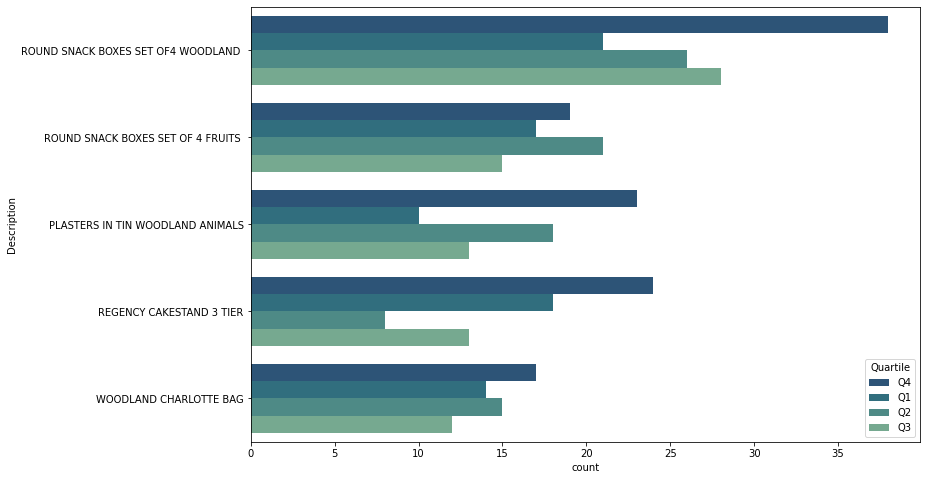

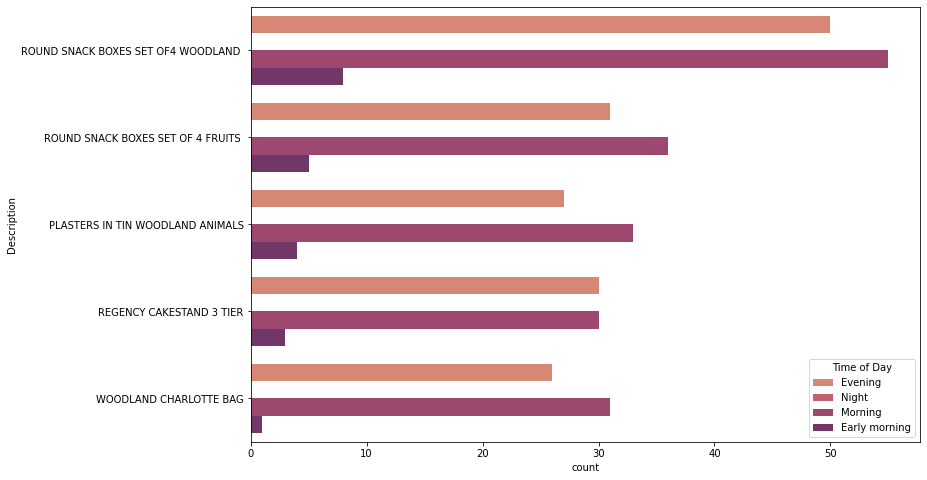

In [650]:
recommendation_system_func(df1)

Enter a product id:22725
Overall Products related to 22725 are :


,Stock Id,Product Name,Count
0,22727,ALARM CLOCK BAKELIKE RED,8
1,22326,ROUND SNACK BOXES SET OF4 WOODLAND,8
2,22728,ALARM CLOCK BAKELIKE PINK,7
3,22730,ALARM CLOCK BAKELIKE IVORY,6
4,22726,ALARM CLOCK BAKELIKE GREEN,5
5,22729,ALARM CLOCK BAKELIKE ORANGE,4


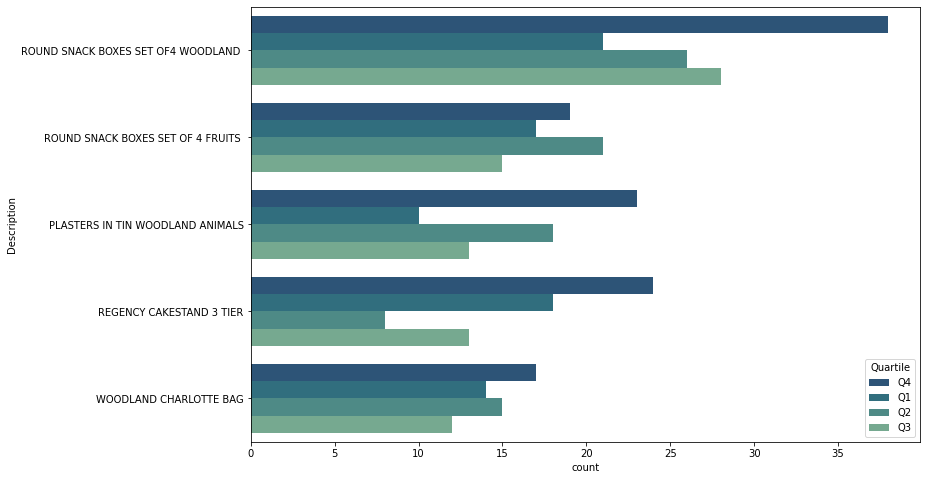

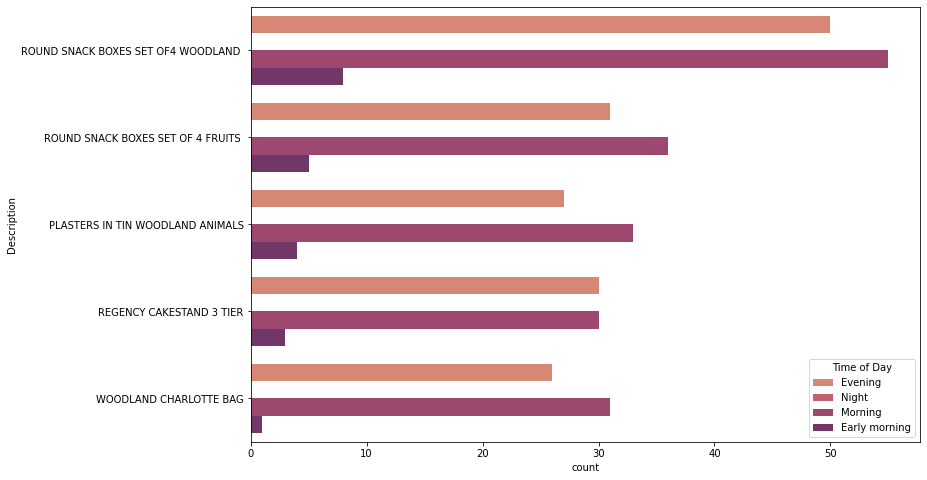

In [601]:
# Enter product id - 2 (22725)
recommendation_system_func(df1)

In [602]:
recommendation_system_func(df1)

Enter a product id:22809
Overall Products related to 22809 are :
There is no product can be recommended!


In [603]:
recommendation_system_func(df1)

Enter a product id:2256523
Overall Products related to 2256523 are :
Invalid Product Id, try again!
